In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Logistic_Iris.csv")

In [3]:
x = dataset.iloc[:, [0,1,2,3]].values

In [4]:
y = dataset.iloc[:, 4].values

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [7]:
dtree= DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [8]:
# Predicted values
y_pred1 = dtree.predict(xtest)

In [9]:
acc_dtree= accuracy_score(ytest,y_pred1)*100
print ("Accuracy using Single Decision Tree: ", acc_dtree)

Accuracy using Single Decision Tree:  97.36842105263158


In [10]:
cm = confusion_matrix(ytest, y_pred1)
print ("\n\n Confusion Matrix for Single Decision Tree: \n", cm)



 Confusion Matrix for Single Decision Tree: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [11]:
# Create a Random forest Classifier
RF = RandomForestClassifier(n_estimators = 100)
# Train the model using the training sets
RF.fit(xtrain, ytrain)

RandomForestClassifier()

In [12]:
# Predicted values
y_pred2 = RF.predict(xtest)

In [13]:
acc_rf= accuracy_score(ytest,y_pred2)*100
print ("Accuracy using Random Forest: ", acc_rf)

Accuracy using Random Forest:  97.36842105263158


In [14]:
cm = confusion_matrix(ytest, y_pred2)
print ("\n\n Confusion Matrix for Random Forest Classifier: \n", cm)



 Confusion Matrix for Random Forest Classifier: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


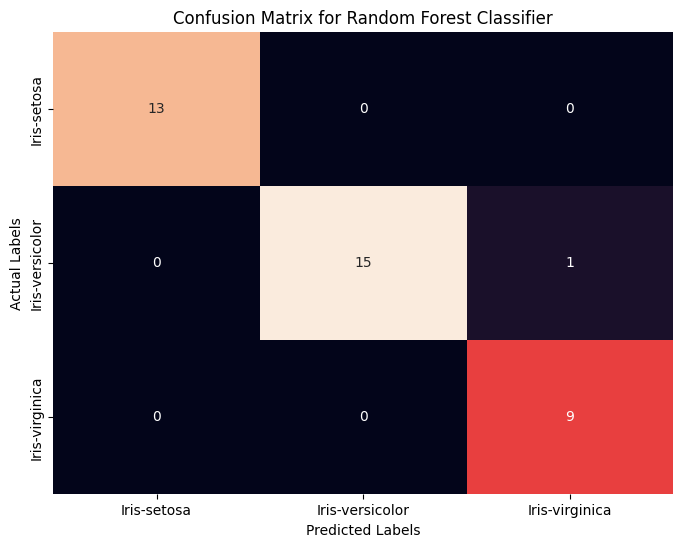

In [15]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cbar=False,xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()